In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 11})

import warnings 
warnings.simplefilter('ignore')
import pickle


%config InlineBackend.figure_formats = 'svg'

In [6]:
cord_well = pd.read_csv('../../data/Исходные_данные/coords.csv')
cord_well.dropna(axis=1, how='all', inplace=True)
with open('../Имена_скважин_pickle/dict_name_well.pickle', 'rb') as f:
    dict_well_name = pickle.load(f)
cord_well['WELL_NAME'] = cord_well['WELL_NAME'].map(dict_well_name)
cord_well.dropna(inplace=True)
cord_well = cord_well.set_index('WELL_NAME')
cord_well.sort_index(inplace=True);

In [7]:
cord_well.head()

,COORD_X,COORD_Y,X2,Y2
WELL_NAME,,,,
0.0,8723.72,9233.28,8734.83,9266.15
1.0,3230.05,10023.99,3228.69,10026.23
2.0,9139.72,8098.28,9107.33,8136.30
3.0,13248.72,3294.28,13180.20,3253.84
4.0,11009.72,8856.28,11029.73,8939.46


<Figure size 864x720 with 0 Axes>

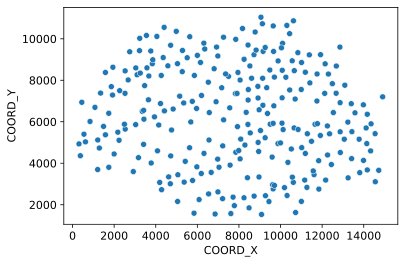

<Figure size 864x720 with 0 Axes>

In [8]:
X = cord_well['COORD_X']
Y = cord_well['COORD_Y']
fig, axes = plt.subplots()
sns.scatterplot(x=X, y=Y)
#for x, y, well in zip(X, Y, cord_well['WELL_NAME']):
#    plt.annotate(well, xy=(x, y), xytext=(-5, 3), textcoords='offset points', ha='left', va='bottom', fontsize=8)
#offset = 500
plt.figure(figsize=(12, 10))
#axes.set_xlim(X.min() - offset, X.max() + offset)
#axes.set_ylim(Y.min() - offset, Y.max() + offset)

In [9]:
cord_well[cord_well['COORD_Y'] > 14000]['WELL_NAME']

KeyError: 'WELL_NAME'

<Figure size 864x720 with 0 Axes>

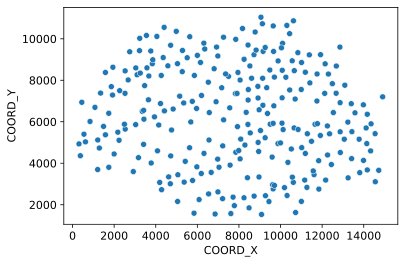

<Figure size 864x720 with 0 Axes>

In [10]:
X = cord_well[cord_well['COORD_Y'] < 14000]['COORD_X']
Y = cord_well[cord_well['COORD_Y'] < 14000]['COORD_Y']
fig, axes = plt.subplots()
sns.scatterplot(x=X, y=Y)
#for x, y, well in zip(X, Y, cord_well['WELL_NAME']):
#    plt.annotate(well, xy=(x, y), xytext=(-5, 3), textcoords='offset points', ha='left', va='bottom', fontsize=8)
#offset = 500
plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

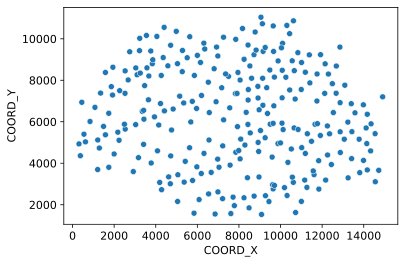

<Figure size 864x720 with 0 Axes>

In [11]:
data = cord_well.dropna()
X = data['COORD_X']
Y = data['COORD_Y']
fig, axes = plt.subplots()
sns.scatterplot(x=X, y=Y)
#for x, y, well in zip(X, Y, cord_well['WELL_NAME']):
#    plt.annotate(well, xy=(x, y), xytext=(-5, 3), textcoords='offset points', ha='left', va='bottom', fontsize=8)
#offset = 500
plt.figure(figsize=(12, 10))

In [12]:
graph_wells = pd.DataFrame(index=range(266))
for well in range(266):
    graph_wells[well] = np.sqrt(np.square(cord_well['COORD_X'] - cord_well[cord_well.index == well]['COORD_X'].values) +
                        np.square(cord_well['COORD_Y'] - cord_well[cord_well.index == well]['COORD_Y'].values))

In [13]:
graph_wells

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.000000,5550.282189,1208.834563,7466.414534,2316.878288,1197.448120,2112.274603,1706.095479,1879.414649,4742.804655,...,4751.633818,3902.751253,1703.789632,1836.696196,1650.054443,2666.949595,7000.858697,4118.238649,7388.558098,7740.414535
1,5550.282189,0.000000,6215.509514,12069.082204,7866.817142,6741.650306,7635.158454,6554.488347,7273.234877,10121.601743,...,829.080852,1788.555145,5775.980221,5916.349271,4472.687248,6694.739180,7255.699064,6868.956089,9719.150350,9519.010449
2,1208.834563,6215.509514,0.000000,6321.573934,2017.786906,1116.962399,2095.214786,497.772202,1117.914273,3906.176775,...,5470.104568,4728.386126,879.996245,2942.017191,1792.375581,1530.075606,6270.660809,3117.241943,6283.835818,6701.673134
3,7466.414534,12069.082204,6321.573934,0.000000,5995.745575,6566.353630,6502.122269,5848.268857,5700.068596,3645.387497,...,11447.148605,10870.636613,6414.923193,8805.689219,7732.730321,5393.659576,7884.938204,5492.007312,4977.398349,5894.226812
4,2316.878288,7866.817142,2017.786906,5995.745575,0.000000,1129.559649,506.557993,2068.559954,1035.284290,2681.284207,...,7068.105652,6207.498601,2872.923750,2927.751109,3691.727659,3058.434436,8068.295918,4709.569222,7448.348587,8036.912300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2666.949595,6694.739180,1530.075606,5393.659576,3058.434436,2525.443316,3325.231418,1124.461861,2028.705494,3909.063369,...,6054.852165,5491.975310,1103.793531,4462.378418,2361.695532,0.000000,5014.708982,1666.872592,4753.812242,5185.524384
262,7000.858697,7255.699064,6270.660809,7884.938204,8068.295918,7384.430380,8297.323963,6038.820084,7033.959670,8418.622345,...,7144.936223,7279.170404,5423.616473,8764.867660,5583.159517,5014.708982,0.000000,3420.000761,3357.410401,2709.276767
263,4118.238649,6868.956089,3117.241943,5492.007312,4709.569222,4174.317558,4991.394844,2773.973523,3688.100107,5090.510211,...,6382.391423,6048.139485,2414.494156,5954.448298,3223.209031,1666.872592,3420.000761,0.000000,3340.444385,3622.757215
264,7388.558098,9719.150350,6283.835818,4977.398349,7448.348587,7220.132193,7842.414172,5854.298413,6541.552184,6699.068826,...,9377.966279,9201.865824,5703.162238,9208.458661,6554.294815,4753.812242,3357.410401,3340.444385,0.000000,916.869575


In [14]:
graph_wells.to_csv('../../data/Преобразованные_данные/graph_wells_adjacency_matrix.csv', index=False)

sns.heatmap(graph_wells)

In [11]:
graph_wells = pd.read_csv('../../data/Преобразованные_данные/graph_wells_adjacency_matrix.csv')
graph_wells

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,256,257,258,259,260,261,262,263,264,265
0,0,0.000000,5550.282189,1208.834563,7466.414534,2316.878288,1197.448120,2112.274603,1706.095479,1879.414649,...,4751.633818,3902.751253,1703.789632,1836.696196,1650.054443,2666.949595,7000.858697,4118.238649,7388.558098,7740.414535
1,1,5550.282189,0.000000,6215.509514,12069.082204,7866.817142,6741.650306,7635.158454,6554.488347,7273.234877,...,829.080852,1788.555145,5775.980221,5916.349271,4472.687248,6694.739180,7255.699064,6868.956089,9719.150350,9519.010449
2,2,1208.834563,6215.509514,0.000000,6321.573934,2017.786906,1116.962399,2095.214786,497.772202,1117.914273,...,5470.104568,4728.386126,879.996245,2942.017191,1792.375581,1530.075606,6270.660809,3117.241943,6283.835818,6701.673134
3,3,7466.414534,12069.082204,6321.573934,0.000000,5995.745575,6566.353630,6502.122269,5848.268857,5700.068596,...,11447.148605,10870.636613,6414.923193,8805.689219,7732.730321,5393.659576,7884.938204,5492.007312,4977.398349,5894.226812
4,4,2316.878288,7866.817142,2017.786906,5995.745575,0.000000,1129.559649,506.557993,2068.559954,1035.284290,...,7068.105652,6207.498601,2872.923750,2927.751109,3691.727659,3058.434436,8068.295918,4709.569222,7448.348587,8036.912300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,2666.949595,6694.739180,1530.075606,5393.659576,3058.434436,2525.443316,3325.231418,1124.461861,2028.705494,...,6054.852165,5491.975310,1103.793531,4462.378418,2361.695532,0.000000,5014.708982,1666.872592,4753.812242,5185.524384
262,262,7000.858697,7255.699064,6270.660809,7884.938204,8068.295918,7384.430380,8297.323963,6038.820084,7033.959670,...,7144.936223,7279.170404,5423.616473,8764.867660,5583.159517,5014.708982,0.000000,3420.000761,3357.410401,2709.276767
263,263,4118.238649,6868.956089,3117.241943,5492.007312,4709.569222,4174.317558,4991.394844,2773.973523,3688.100107,...,6382.391423,6048.139485,2414.494156,5954.448298,3223.209031,1666.872592,3420.000761,0.000000,3340.444385,3622.757215
264,264,7388.558098,9719.150350,6283.835818,4977.398349,7448.348587,7220.132193,7842.414172,5854.298413,6541.552184,...,9377.966279,9201.865824,5703.162238,9208.458661,6554.294815,4753.812242,3357.410401,3340.444385,0.000000,916.869575


In [11]:
import sys
import os

# Добавляем путь к корневой директории проекта
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(current_dir), '..', '..')))

# Импортируем функцию из модуля
from functions.make_df_with_count_days_ago import make_df_with_count_days_ago

ModuleNotFoundError: No module named 'functions'